In [6]:
import pandas as pd
import torch
import matplotlib.pyplot as plt

from dataset import Dataset
from model import LSTMStockPriceModel

30
tensor([ 0.0000,  0.0063,  0.0167, -0.0090,  0.0031,  0.0019,  0.0375,  0.0231,
        -0.0058,  0.0035, -0.0223, -0.0116,  0.0060,  0.0004,  0.0260, -0.0086,
         0.0074,  0.0062, -0.0078, -0.0004, -0.0082, -0.0319, -0.0188,  0.0097,
        -0.0482,  0.0079, -0.0122,  0.0002, -0.0448, -0.0079])
tensor([ 0.0202,  0.0153,  0.0193, -0.0022,  0.0120])
tensor([0.0502, 0.0303, 0.0348, 0.0335, 0.0337])


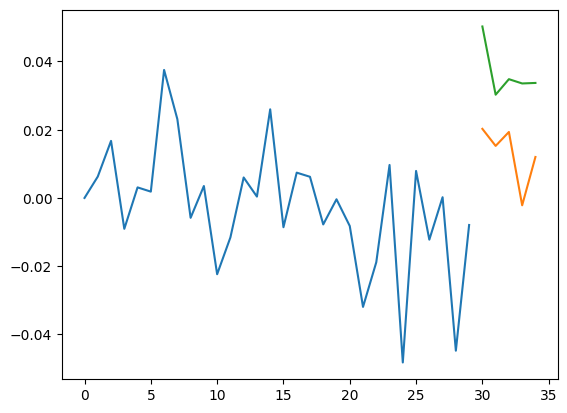

In [3]:
model = LSTMStockPriceModel().float()
model.load_state_dict(torch.load('./lstm.t7'))
model.eval()

df = pd.read_csv('../data/stocks_prices_prep.csv', sep=';')
test_set = Dataset(df, seq_len=30)
print(test_set.seq_len)

h = torch.zeros(2, 1, 8)
c = torch.zeros(2, 1, 8)
state = None#

model_start = test_set[0][0]
model_start = model_start[None, :, :]

gt = test_set[0][1].squeeze()

model_in = model_start
model_start = model_start.squeeze()

for i in range(test_set.test_len):
    model_out, state = model(model_in, state)
    model_in = torch.cat((model_in[:, 1:, :], model_out[:, :, None]), dim=1)

pred = model_in[:, -5:, :].squeeze().detach()
    
print(model_start)
print(gt)
print(pred)

plt.plot(range(0, test_set.seq_len), model_start)
plt.plot(range(test_set.seq_len, test_set.seq_len+test_set.test_len), gt)
plt.plot(range(test_set.seq_len, test_set.seq_len+test_set.test_len), pred)
plt.show()

In [7]:

list_of_strings = ['abc', 'def', 'ghi'] # give a list of strings

new_string = " ".join(list_of_strings)

new_string

'abc def ghi'